In [1]:
import csky as cy

In [2]:
import pandas as pd
import histlite as hl
import numpy as np
import copy
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [3]:
cy.plotting.mrichman_mpl()
import matplotlib as mpl
plt.rc('font', size=13)
plot_dir = 'plots/'

/home/ssclafani/.vens/py3_venv/lib/python3.7/site-packages/csky/plotting.py:92: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  r'\SetSymbolFont{operators}   {sans}{OT1}{cmss} {m}{n}'


In [4]:
soft_colors = ['#004466', '#d06050', '#2aca80', '#dd9388', '#caca68']
friendly_colors = ['#184b68', '#cf4d30', '#62badb', '#e797b4', '#eec9b4', '#f7dede']
viridis_colors = ['#fde725', '#5ec962', '#21918c', '#3b528b', '#440154']
colors = soft_colors

In [5]:
mc = pd.read_hdf('/data/ana/PointSource/DNNCascade/analysis/version-001-p01/MC_NuGen_bfrv1_2153x.hdf')
#spice321_snowstorm = pd.read_hdf('/data/ana/PointSource/DNNCascade/analysis/version-001-p01/systematics/SnowStorm_Spice321/MC_NuGen_snowstorm_214xx.hdf')
#ftp_snowstorm = np.load('/data/user/ssclafani/PointSource/DNNCascade/final_level/lilw_allflavor_snowstorm.npy')
ftp_baseline = np.load('/data/user/ssclafani/PointSource/DNNCascade/final_level/lilw_allflavor_baseline.npy')

In [6]:
mask_numu = (ftp_baseline['dataset'] == 22492) | (ftp_baseline['dataset'] == 22493) | (ftp_baseline['dataset'] == 22494) 
mask_nue = (ftp_baseline['dataset'] == 22495) | (ftp_baseline['dataset'] == 22496) | (ftp_baseline['dataset'] == 22497)
mask_nutau = (ftp_baseline['dataset'] == 22498) | (ftp_baseline['dataset'] == 22499) | (ftp_baseline['dataset'] == 22500)


/home/ssclafani/.vens/py3_venv/lib/python3.7/site-packages/pandas/core/computation/expressions.py:201: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "


Text(0, 0.5, 'Astro Counts')

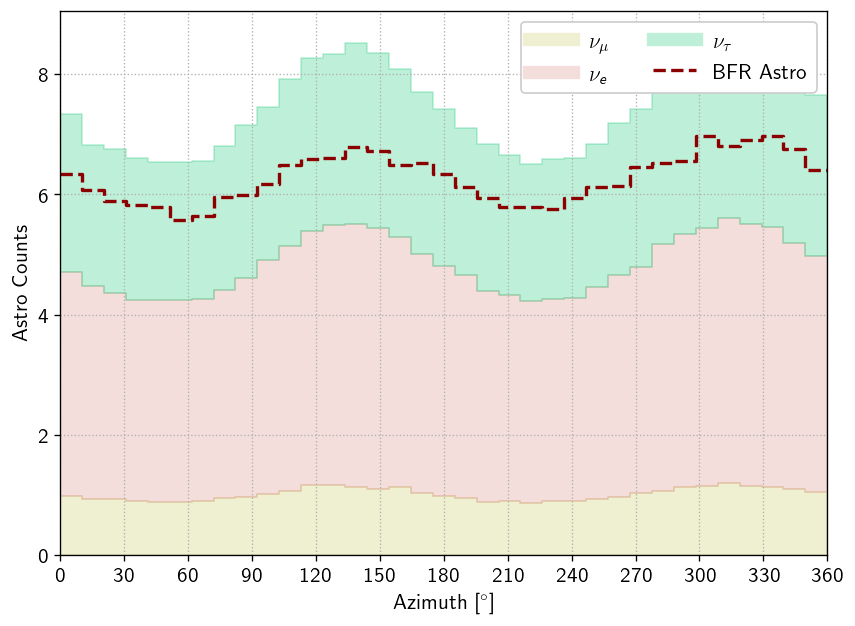

In [24]:
#lt = 3519.685 * 86400 
bins = 35
range=(0,360)
fig, (ax1) = plt.subplots(1,1, figsize=(8.25,6))
fig.set_facecolor('w')

#hb_data = hl.hist(np.degrees(exp.EventGeneratorSelectedRecoNN_I3Particle_azimuth).values, bins=bins,range=range)

#hb_bfr_atmo = hl.hist(np.degrees(mc.azi),
#       weights = mc.weights_MCEq_H3a_sibyll2_3c_total*lt, log=False, bins=bins,  range=range)
hb_bfr_astro = hl.hist(np.degrees(mc.azi),
       weights = bfr_weight_astro*lt, log=False, bins=bins,  range=range)
hb_t = {}
flavors = ['numu', 'nue', 'nutau']

masks = [mask_numu, mask_nue, mask_nutau]


for i, flavor in enumerate(flavors):
    mask = masks[i]
    #hb_ftp = hl.hist(np.degrees(ftp_baseline['azi'][mask]),
    #                weights=ftp_baseline['w_atmo'][mask]/(86400*365)*lt,bins = bins, range=range)
    hb_ftp_astro = hl.hist(np.degrees(ftp_baseline['azi'][mask]),
                    weights=ftp_baseline['w_astro'][mask]/(86400*365)*lt,bins = bins, range=range)
    hb_t[flavor] =  hb_ftp_astro 
    
'''hb_corsika = hl.hist(np.degrees(mu_corsika.azi).values, 
                weights=mu_corsika['weights_GaisserH3aWeight'] * lt,
                bins = bins, range=range)

hb_muon = hl.hist(np.degrees(mu_muongun.azi).values, 
                weights=mu_muongun['weights_GaisserH4a_atmod12_SIBYLL'] * lt,
                bins = bins, range=range)
'''
hb_t_bfr =  hb_bfr_astro  

#for i, flavor in flavors:
#    hl.plot1d(ax1, hb_t[flavor], errorbands=False, label=r'FTP {}'.format(flavor), color=colors[i])

hl.plot1d(ax1, hb_t_bfr, errorbands=False, ls ='--', label=r'BFR  Astro', color='darkred') #colors[1])

#hl.plot1d(ax1, hb_data, crosses=True, label='Data' , color='k')

#hl.stack1d(ax1, [hb_t['nue'], hb_t['numu'], hb_t['nutau']], colors=colors[::-1], 
#           labels=[r'$\nu_{e}$', r'$\nu_{\mu}$', r'$\nu_{\tau}$'], alpha=0.3)

hl.stack1d(ax1, [hb_t['numu'], hb_t['nue'], hb_t['nutau']], colors=colors[::-1], 
           labels=[r'$\nu_{\mu}$', r'$\nu_{e}$', r'$\nu_{\tau}$'], alpha=0.3)

hb_tot = hb_t['numu']+ hb_t['nue'] + hb_t['nutau']

#ax2.set_xlabel(r'Azimuth [$^\circ$]')
ax1.set_xticks(np.arange(0,360.1,30))
ax1.set_xlim(0,360)
ax1.set_xlabel('Azimuth [$^{\circ}$]')
#ax2.set_ylim(.5, 1.5)
##ax2.set_ylabel('MC/Data')
#ax2.set_yticks([0.5,1.0,1.5])
#ax2.axhline(1.0, ls=':', c='k' )
ax1.grid()
ax1.legend(ncol=2)
#ax2.grid()
ax1.set_ylim(0)
#hl.plot1d(ax2, hb_tot/hb_data, crosses=False, color='k') 
#hl.plot1d(ax2, hb_t_bfr/hb_data, crosses=False, color='darkred', ls='--') 

ax1.set_ylabel('Astro Counts')
#cy.plotting.saving(plot_dir , 'azimuth_datamc')

In [37]:
bfr_mask_nue = np.abs(mc['MCPrimary_pdg_encoding']) == 12
bfr_mask_numu = np.abs(mc['MCPrimary_pdg_encoding']) == 14
bfr_mask_nutau = np.abs(mc['MCPrimary_pdg_encoding']) == 16
bfr_mask = [bfr_mask_numu, bfr_mask_nue, bfr_mask_nutau]

/home/ssclafani/.vens/py3_venv/lib/python3.7/site-packages/pandas/core/computation/expressions.py:201: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "
/home/ssclafani/.vens/py3_venv/lib/python3.7/site-packages/numpy/core/_asarray.py:85: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'Total Counts')

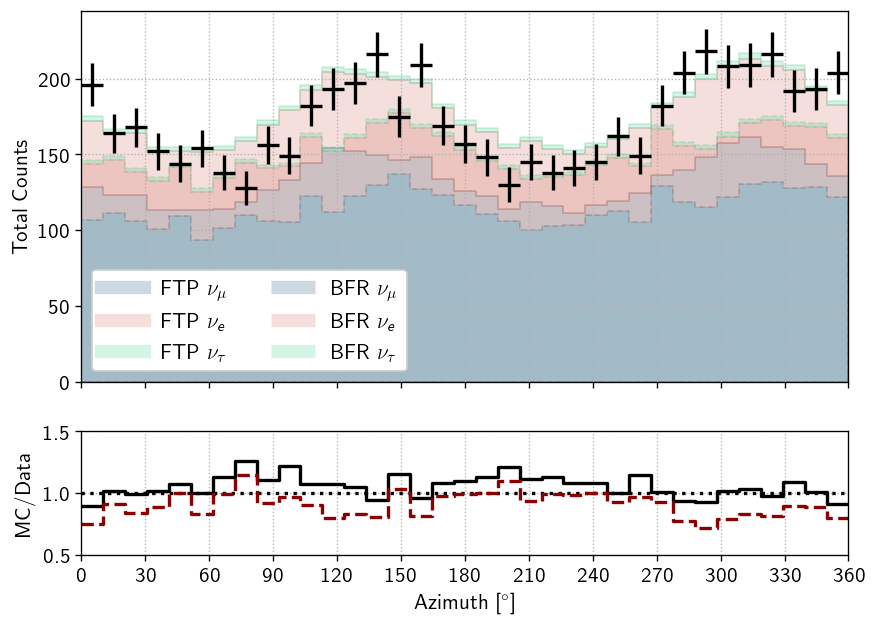

In [54]:
#lt = 3519.685 * 86400 
bins = 35
range=(0,360)
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(8.25,6), gridspec_kw = {'height_ratios':[3, 1]}, sharex=True)
fig.set_facecolor('w')

hb_data = hl.hist(np.degrees(exp.EventGeneratorSelectedRecoNN_I3Particle_azimuth).values, bins=bins,range=range)


hb_t = {}
flavors = ['numu', 'nue', 'nutau']

masks = [mask_numu, mask_nue, mask_nutau]


for i, flavor in enumerate(flavors):
    mask = masks[i]
    hb_ftp = hl.hist(np.degrees(ftp_baseline['azi'][mask]),
                    weights=ftp_baseline['w_atmo'][mask]/(86400*365)*lt,bins = bins, range=range)
    hb_ftp_astro = hl.hist(np.degrees(ftp_baseline['azi'][mask]),
                    weights=ftp_baseline['w_astro'][mask]/(86400*365)*lt,bins = bins, range=range)
    hb_t[flavor] = hb_ftp  + hb_ftp_astro 
    
hb_corsika = hl.hist(np.degrees(mu_corsika.azi).values, 
                weights=mu_corsika['weights_GaisserH3aWeight'] * lt,
                bins = bins, range=range)

hb_muon = hl.hist(np.degrees(mu_muongun.azi).values, 
                weights=mu_muongun['weights_GaisserH4a_atmod12_SIBYLL'] * lt,
                bins = bins, range=range)


#for i, flavor in flavors:
#    hl.plot1d(ax1, hb_t[flavor], errorbands=False, label=r'FTP {}'.format(flavor), color=colors[i])
hb_t_bfr = {}
for i, flavor in enumerate(flavors):
    mask = bfr_mask[i]
    hb_bfr_atmo = hl.hist(np.degrees(mc.azi[mask]),
       weights = mc.weights_MCEq_H3a_sibyll2_3c_total[mask]*lt, log=False, bins=bins,  range=range)
    hb_bfr_astro = hl.hist(np.degrees(mc.azi[mask]),
       weights = bfr_weight_astro[mask]*lt, log=False, bins=bins,  range=range)
    hb_t_bfr[flavor] = hb_bfr_atmo  + hb_bfr_astro  

    #hl.plot1d(ax1, hb_t_bfr[mask], errorbands=False, ls ='--', label=r'B', color=colors[i+3])

hl.plot1d(ax1, hb_data, crosses=True , color='k')

#hl.stack1d(ax1, [hb_t['nue'], hb_t['numu'], hb_t['nutau']], colors=colors[::-1], 
#           labels=[r'$\nu_{e}$', r'$\nu_{\mu}$', r'$\nu_{\tau}$'], alpha=0.3)

hl.stack1d(ax1, [hb_t['numu'], hb_t['nue'], hb_t['nutau']], colors=colors, 
           labels=[r'FTP $\nu_{\mu}$', r'FTP $\nu_{e}$', r'FTP $\nu_{\tau}$'], alpha=0.2, )
hl.stack1d(ax1, [hb_t_bfr['numu'], hb_t_bfr['nue'], hb_t_bfr['nutau']], colors, 
           labels=[r'BFR $\nu_{\mu}$', r'BFR $\nu_{e}$', r'BFR $\nu_{\tau}$'], alpha=0.2, ls='--')

hb_tot = hb_t['numu']+ hb_t['nue'] + hb_t['nutau']
hb_tot_bfr = hb_t_bfr['numu'] + hb_t_bfr['nue'] + hb_t_bfr['nutau']

ax2.set_xlabel(r'Azimuth [$^\circ$]')
ax1.set_xticks(np.arange(0,360.1,30))
ax1.set_xlim(0,360)
ax2.set_ylim(.5, 1.5)
ax2.set_ylabel('MC/Data')
ax2.set_yticks([0.5,1.0,1.5])
ax2.axhline(1.0, ls=':', c='k' )
ax1.grid()
ax1.legend(ncol=2)
ax2.grid()
ax1.set_ylim(0)
hl.plot1d(ax2, hb_tot/hb_data, crosses=False, color='k') 
hl.plot1d(ax2, hb_tot_bfr/hb_data, crosses=False, color='darkred', ls='--') 

ax1.set_ylabel('Total Counts')
#cy.plotting.saving(plot_dir , 'azimuth_datamc')

/home/ssclafani/.vens/py3_venv/lib/python3.7/site-packages/pandas/core/computation/expressions.py:201: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "
/home/ssclafani/.vens/py3_venv/lib/python3.7/site-packages/numpy/core/_asarray.py:85: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'Total Counts')

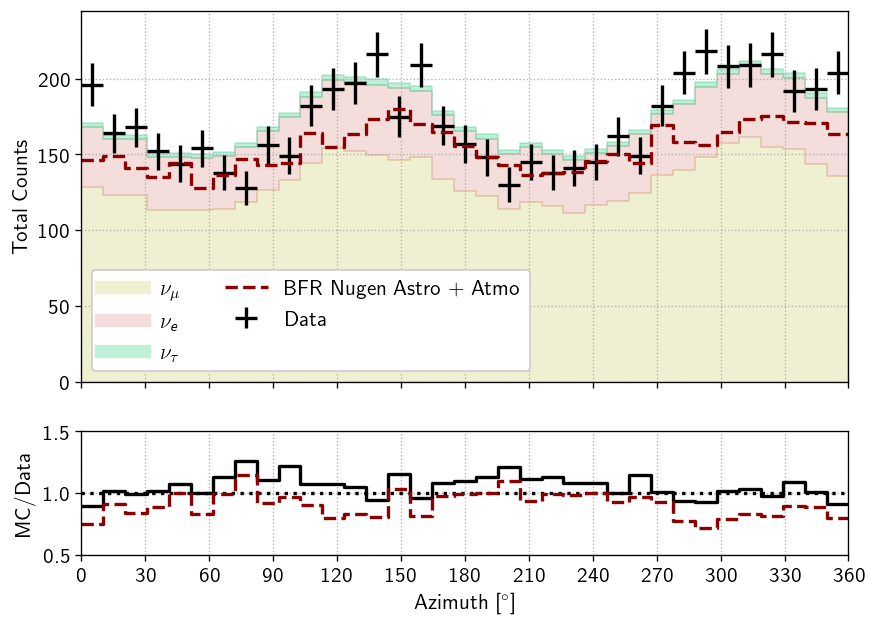

In [39]:
#lt = 3519.685 * 86400 
bins = 35
range=(0,360)
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(8.25,6), gridspec_kw = {'height_ratios':[3, 1]}, sharex=True)
fig.set_facecolor('w')

hb_data = hl.hist(np.degrees(exp.EventGeneratorSelectedRecoNN_I3Particle_azimuth).values, bins=bins,range=range)

hb_bfr_atmo = hl.hist(np.degrees(mc.azi),
       weights = mc.weights_MCEq_H3a_sibyll2_3c_total*lt, log=False, bins=bins,  range=range)
hb_bfr_astro = hl.hist(np.degrees(mc.azi),
       weights = bfr_weight_astro*lt, log=False, bins=bins,  range=range)
hb_t = {}
flavors = ['numu', 'nue', 'nutau']

masks = [mask_numu, mask_nue, mask_nutau]


for i, flavor in enumerate(flavors):
    mask = masks[i]
    hb_ftp = hl.hist(np.degrees(ftp_baseline['azi'][mask]),
                    weights=ftp_baseline['w_atmo'][mask]/(86400*365)*lt,bins = bins, range=range)
    hb_ftp_astro = hl.hist(np.degrees(ftp_baseline['azi'][mask]),
                    weights=ftp_baseline['w_astro'][mask]/(86400*365)*lt,bins = bins, range=range)
    hb_t[flavor] = hb_ftp  + hb_ftp_astro 
    
hb_corsika = hl.hist(np.degrees(mu_corsika.azi).values, 
                weights=mu_corsika['weights_GaisserH3aWeight'] * lt,
                bins = bins, range=range)

hb_muon = hl.hist(np.degrees(mu_muongun.azi).values, 
                weights=mu_muongun['weights_GaisserH4a_atmod12_SIBYLL'] * lt,
                bins = bins, range=range)

hb_t_bfr = hb_bfr_atmo  + hb_bfr_astro  

#for i, flavor in flavors:
#    hl.plot1d(ax1, hb_t[flavor], errorbands=False, label=r'FTP {}'.format(flavor), color=colors[i])

hl.plot1d(ax1, hb_t_bfr, errorbands=False, ls ='--', label=r'BFR Nugen Astro + Atmo', color='darkred') #colors[1])

hl.plot1d(ax1, hb_data, crosses=True, label='Data' , color='k')

#hl.stack1d(ax1, [hb_t['nue'], hb_t['numu'], hb_t['nutau']], colors=colors[::-1], 
#           labels=[r'$\nu_{e}$', r'$\nu_{\mu}$', r'$\nu_{\tau}$'], alpha=0.3)

hl.stack1d(ax1, [hb_t['numu'], hb_t['nue']*.9, hb_t['nutau']], colors=colors[::-1], 
           labels=[r'$\nu_{\mu}$', r'$\nu_{e}$', r'$\nu_{\tau}$'], alpha=0.3)

hb_tot = hb_t['numu']+ hb_t['nue'] + hb_t['nutau']

ax2.set_xlabel(r'Azimuth [$^\circ$]')
ax1.set_xticks(np.arange(0,360.1,30))
ax1.set_xlim(0,360)
ax2.set_ylim(.5, 1.5)
ax2.set_ylabel('MC/Data')
ax2.set_yticks([0.5,1.0,1.5])
ax2.axhline(1.0, ls=':', c='k' )
ax1.grid()
ax1.legend(ncol=2)
ax2.grid()
ax1.set_ylim(0)
hl.plot1d(ax2, hb_tot/hb_data, crosses=False, color='k') 
hl.plot1d(ax2, hb_t_bfr/hb_data, crosses=False, color='darkred', ls='--') 

ax1.set_ylabel('Total Counts')
#cy.plotting.saving(plot_dir , 'azimuth_datamc')

/home/ssclafani/.vens/py3_venv/lib/python3.7/site-packages/pandas/core/computation/expressions.py:201: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "


Text(0, 0.5, 'Total Counts')

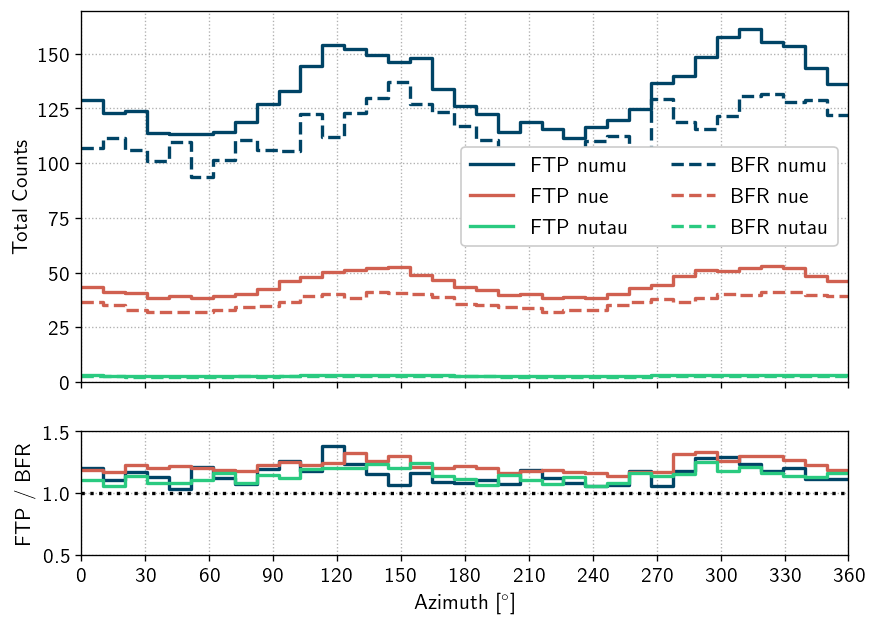

In [66]:
#lt = 3519.685 * 86400 
bins = 35
range=(0,360)
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(8.25,6), gridspec_kw = {'height_ratios':[3, 1]}, sharex=True)
fig.set_facecolor('w')

hb_t = {}
flavors = ['numu', 'nue', 'nutau']

masks = [mask_numu, mask_nue, mask_nutau]

hb_t_bfr = {}
for i, flavor in enumerate(flavors):
    mask = bfr_mask[i]
    hb_bfr_atmo = hl.hist(np.degrees(mc.azi[mask]),
       weights = mc.weights_MCEq_H3a_sibyll2_3c_total[mask]*lt, log=False, bins=bins,  range=range)
    hb_bfr_astro = hl.hist(np.degrees(mc.azi[mask]),
       weights = bfr_weight_astro[mask]*lt, log=False, bins=bins,  range=range)
    hb_t_bfr[flavor] = hb_bfr_atmo  + hb_bfr_astro  
   
for i, flavor in enumerate(flavors):
    mask = masks[i]
    hb_ftp = hl.hist(np.degrees(ftp_baseline['azi'][mask]),
                    weights=ftp_baseline['w_atmo'][mask]/(86400*365)*lt,bins = bins, range=range)
    hb_ftp_astro = hl.hist(np.degrees(ftp_baseline['azi'][mask]),
                    weights=ftp_baseline['w_astro'][mask]/(86400*365)*lt,bins = bins, range=range)
    hb_t[flavor] = hb_ftp  + hb_ftp_astro 
    
hb_corsika = hl.hist(np.degrees(mu_corsika.azi).values, 
                weights=mu_corsika['weights_GaisserH3aWeight'] * lt,
                bins = bins, range=range)

hb_muon = hl.hist(np.degrees(mu_muongun.azi).values, 
                weights=mu_muongun['weights_GaisserH4a_atmod12_SIBYLL'] * lt,
                bins = bins, range=range)


for i, flavor in enumerate(flavors):
    hl.plot1d(ax1, hb_t[flavor], errorbands=False, label=r'FTP {}'.format(flavor), color=colors[i])
for i, flavor in enumerate(flavors):
    hl.plot1d(ax1, hb_t_bfr[flavor], errorbands=False, label=r'BFR {}'.format(flavor), color=colors[i], ls='--')

#hl.plot1d(ax1, hb_t_bfr.normalize(), errorbands=False, ls ='--', label=r'BFR Nugen Astro + Atmo', color='darkred') #colors[1])

#hl.plot1d(ax1, hb_data.normalize(), crosses=True , color='k')

#hl.stack1d(ax1, [hb_t['nue'], hb_t['numu'], hb_t['nutau']], colors=colors[::-1], 
#           labels=[r'$\nu_{e}$', r'$\nu_{\mu}$', r'$\nu_{\tau}$'], alpha=0.3)

#hl.stack1d(ax1, [hb_t['numu'], hb_t['nue'], hb_t['nutau']], colors=colors[::-1], 
#           labels=[r'$\nu_{\mu}$', r'$\nu_{e}$', r'$\nu_{\tau}$'], alpha=0.3)

#hb_tot = hb_t['numu']+ hb_t['nue'] + hb_t['nutau']
#hb_tot_bfr = hb_t_bfr['numu']+ hb_t_bfr['nue'] + hb_t_bfr['nutau']

ax2.set_xlabel(r'Azimuth [$^\circ$]')
ax1.set_xticks(np.arange(0,360.1,30))
ax1.set_xlim(0,360)
ax2.set_ylim(.5, 1.5)
ax2.set_ylabel('FTP / BFR')
ax2.set_yticks([0.5,1.0,1.5])
ax2.axhline(1.0, ls=':', c='k' )
ax1.grid()
ax1.legend(ncol=2)
ax2.grid()
ax1.set_ylim(0)
for i, flavor in enumerate(flavors):
    hl.plot1d(ax2, hb_t[flavor] / hb_t_bfr[flavor], color= colors[i])

#hl.plot1d(ax2, hb_tot/hb_data, crosses=False, color='k') 
#hl.plot1d(ax2, hb_tot_bfr/hb_data, crosses=False, color='darkred', ls='--') 

ax1.set_ylabel('Total Counts')
#cy.plotting.saving(plot_dir , 'azimuth_datamc')

In [ ]:
#lt = 3519.685 * 86400 
bins = 35
range=(0,360)
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(8.25,6), gridspec_kw = {'height_ratios':[3, 1]}, sharex=True)
fig.set_facecolor('w')

hb_data = hl.hist(np.degrees(exp.EventGeneratorSelectedRecoNN_I3Particle_azimuth).values, bins=bins,range=range)

hb_bfr_atmo = hl.hist(np.degrees(mc.azi),
       weights = mc.weights_MCEq_H3a_sibyll2_3c_total*lt, log=False, bins=bins,  range=range)
hb_bfr_astro = hl.hist(np.degrees(mc.azi),
       weights = bfr_weight_astro*lt, log=False, bins=bins,  range=range)
hb_t = {}
flavors = ['numu', 'nue', 'nutau']

masks = [mask_numu, mask_nue, mask_nutau]


for i, flavor in enumerate(flavors):
    mask = masks[i]
    hb_ftp = hl.hist(np.degrees(ftp_baseline['azi'][mask]),
                    weights=ftp_baseline['w_atmo'][mask]/(86400*365)*lt,bins = bins, range=range)
    hb_ftp_astro = hl.hist(np.degrees(ftp_baseline['azi'][mask]),
                    weights=ftp_baseline['w_astro'][mask]/(86400*365)*lt,bins = bins, range=range)
    hb_t[flavor] = hb_ftp  + hb_ftp_astro 
    
hb_corsika = hl.hist(np.degrees(mu_corsika.azi).values, 
                weights=mu_corsika['weights_GaisserH3aWeight'] * lt,
                bins = bins, range=range)

hb_muon = hl.hist(np.degrees(mu_muongun.azi).values, 
                weights=mu_muongun['weights_GaisserH4a_atmod12_SIBYLL'] * lt,
                bins = bins, range=range)

hb_t_bfr = hb_bfr_atmo  + hb_bfr_astro  

for i, flavor in enumerate(flavors):
    hl.plot1d(ax1, hb_t[flavor].normalize(), errorbands=False, label=r'FTP {}'.format(flavor), color=colors[i])

hl.plot1d(ax1, hb_t_bfr.normalize(), errorbands=False, ls ='--', label=r'BFR Nugen Astro + Atmo', color='darkred') #colors[1])

hl.plot1d(ax1, hb_data.normalize(), crosses=True, label='Data' , color='k')

#hl.stack1d(ax1, [hb_t['nue'], hb_t['numu'], hb_t['nutau']], colors=colors[::-1], 
#           labels=[r'$\nu_{e}$', r'$\nu_{\mu}$', r'$\nu_{\tau}$'], alpha=0.3)

#hl.stack1d(ax1, [hb_t['numu'], hb_t['nue'], hb_t['nutau']], colors=colors[::-1], 
#           labels=[r'$\nu_{\mu}$', r'$\nu_{e}$', r'$\nu_{\tau}$'], alpha=0.3)

hb_tot = hb_t['numu']+ hb_t['nue'] + hb_t['nutau']

ax2.set_xlabel(r'Azimuth [$^\circ$]')
ax1.set_xticks(np.arange(0,360.1,30))
ax1.set_xlim(0,360)
ax2.set_ylim(.5, 1.5)
ax2.set_ylabel('MC/Data')
ax2.set_yticks([0.5,1.0,1.5])
ax2.axhline(1.0, ls=':', c='k' )
ax1.grid()
ax1.legend(ncol=2)
ax2.grid()
ax1.set_ylim(0)
hl.plot1d(ax2, hb_tot/hb_data, crosses=False, color='k') 
hl.plot1d(ax2, hb_t_bfr/hb_data, crosses=False, color='darkred', ls='--') 

ax1.set_ylabel('Normalized Counts')
#cy.plotting.saving(plot_dir , 'azimuth_datamc')

In [8]:
for k in mc.keys():
    if 'pdg' in k:
        print(k)

MCPrimary_pdg_encoding


In [9]:
mask = (ftp_baseline['dataset'] == 22495) | (ftp_baseline['dataset'] == 22496) | (ftp_baseline['dataset'] == 22497) 
mask2 = (mc.MCPrimary_pdg_encoding == 12) | (mc.MCPrimary_pdg_encoding == -12)

/home/ssclafani/.vens/py3_venv/lib/python3.7/site-packages/pandas/core/computation/expressions.py:201: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "


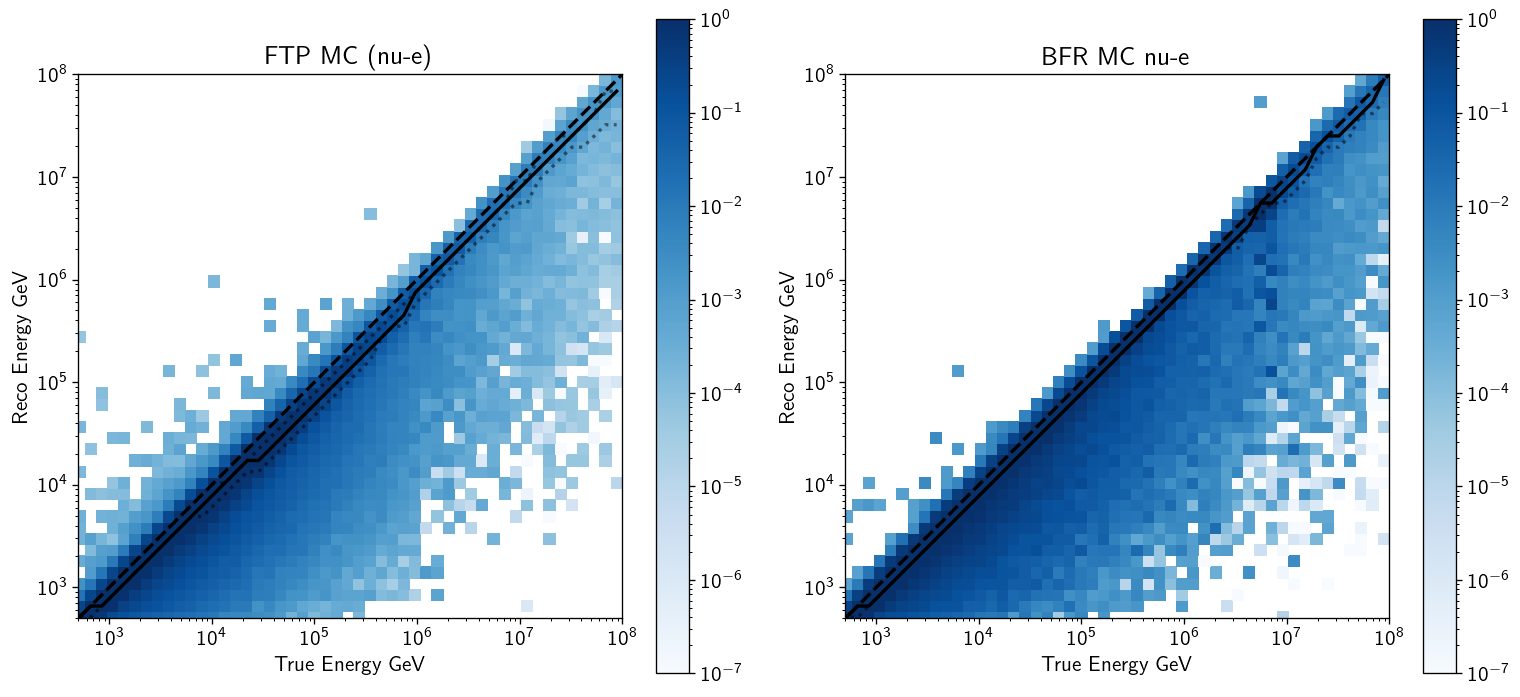

In [10]:
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(13,6))
ax.set_title('FTP MC (nu-e)')
bins= np.logspace(2,8,56)
ax.set_aspect('equal')
ax2.set_aspect('equal')
h = hl.hist((ftp_baseline[mask]['trueE'], ftp_baseline[mask]['energy']), weights=ftp_baseline[mask]['w_astro'],
            log=True, bins=bins)
hl.plot2d(ax, h, cbar=True, cmap='Blues', log=True, vmin=1e-7, vmax = 1)
ax.plot(h.median(axis=1).centers[0], h.median(axis=1).values, c='k')
ax.plot(h.contain(axis=1).centers[0], h.contain(axis=1).values, c='k', alpha=.5, ls=':')
ax.plot(h.contain(axis=1, frac=1-.682689).centers[0], h.contain(axis=1, frac=1-.682689).values, c='k', alpha=.5, ls=':')
ax.set_xlabel('True Energy GeV')
ax.set_ylabel('Reco Energy GeV')
ax.plot((100,1e8), (100, 1e8), ls='--', c='k')
ax.set_ylim(500)
ax.set_xlim(500)

ax2.set_title('BFR MC nu-e')
h2 = hl.hist((mc[mask2]['trueE'], mc[mask2]['energy']), weights=mc[mask2].weights_aachen_flux * mc[mask2].weights_livetime,
            log=True, bins=bins)
hl.plot2d(ax2, h2, cbar=True, cmap='Blues', log=True, vmin=1e-7, vmax=1)
ax2.plot(h2.median(axis=1).centers[0], h2.median(axis=1).values, c='k')
ax2.plot(h2.contain(axis=1).centers[0], h2.contain(axis=1).values, c='k', alpha=.5, ls=':')
ax2.plot(h2.contain(axis=1, frac=1-.682689).centers[0], h2.contain(axis=1, frac=1-.682689).values, c='k', alpha=.5, ls=':')
ax2.plot((100,1e8), (100, 1e8), ls='--', c='k')
ax2.set_xlabel('True Energy GeV')
ax2.set_ylabel('Reco Energy GeV')
ax2.set_ylim(500)
ax2.set_xlim(500)
plt.tight_layout()

In [11]:
mu_muongun = pd.read_hdf('/data/ana/PointSource/DNNCascade/analysis/version-001-p01/MC_MuonGun_2131x.hdf')
mu_corsika = pd.read_hdf('/data/ana/PointSource/DNNCascade/analysis/version-001-p01/MC_CORSIKA_20904.hdf')

In [12]:
exps = pd.DataFrame()
years = np.arange(2011,2021,1)
for year in years:
    exp = pd.read_hdf('/data/ana/PointSource/DNNCascade/analysis/version-001-p01/IC86_{}_exp.hdf'.format(year))
    exps = pd.concat([exps, exp])

In [13]:
sum(exps.runs % 10 == 1)/len(exps)

0.10120485971271312

In [14]:
exp = exps[exps.runs % 10 == 1]

In [15]:
for k in mc.keys():
    if 'one' in k:
        print(k)

BDT_astroness_bdt_mu0100_cscd0000_01_pred_000
BDT_astroness_bdt_mu0100_cscd0000_01_runtime_prediction
BDT_astroness_bdt_mu0100_cscd0000_01_runtime_preprocess
BDT_astroness_bdt_mu0100_cscd0000_wo_energy_01_pred_000
BDT_astroness_bdt_mu0100_cscd0000_wo_energy_01_runtime_prediction
BDT_astroness_bdt_mu0100_cscd0000_wo_energy_01_runtime_preprocess
BDT_astroness_bdt_mu0100_cscd0000_wo_energy_zenith_01_pred_000
BDT_astroness_bdt_mu0100_cscd0000_wo_energy_zenith_01_runtime_prediction
BDT_astroness_bdt_mu0100_cscd0000_wo_energy_zenith_01_runtime_preprocess
BDT_astroness_bdt_mu0100_cscd0000_wo_zenith_01_pred_000
BDT_astroness_bdt_mu0100_cscd0000_wo_zenith_01_runtime_prediction
BDT_astroness_bdt_mu0100_cscd0000_wo_zenith_01_runtime_preprocess


In [16]:
for k in mc.keys():
    if 'weight' in k:
            print('{}'.format(k))

weights_MCEq_H3a_sibyll2_3c_conv
weights_MCEq_H3a_sibyll2_3c_pr
weights_MCEq_H3a_sibyll2_3c_total
weights_aachen_flux
weights_aachen_flux_8yr
weights_cscd_hans
weights_cscd_icrc15
weights_global_fit
weights_hese4_bestfit
weights_hese4_fixed
weights_hese6
weights_hese_flux
weights_mese_flux
weights_meta_info_n_events_per_run
weights_meta_info_n_files
weights
weights_livetime


In [17]:
for k in mc.keys():
    if 'veto' in k:
        print(k)

nuveto_pf_dnn_cascade_selection_H3a_SIBYLL2_3c_conv
nuveto_pf_dnn_cascade_selection_H3a_SIBYLL2_3c_pr
nuveto_pf_dnn_cascade_selection_H3a_SIBYLL2_3c_total


In [18]:
lt = mc.weights_livetime[0] * .101

In [19]:
#colors = ['#FF7F0E', '#0B3D53', '#5C9FC9', ]

In [20]:
sum(mc.weights_MCEq_H3a_sibyll2_3c_conv*lt)

5058.894252795068

In [21]:
bfr_weight_astro = 1.36e-18 * mc.ow * (mc.trueE/1e5)**-2.37

In [ ]:
#lt = 3519.685 * 86400 
bins = 35
range=(0,360)
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(8.25,6), gridspec_kw = {'height_ratios':[3, 1]}, sharex=True)
fig.set_facecolor('w')

hb_data = hl.hist(np.degrees(exp.EventGeneratorSelectedRecoNN_I3Particle_azimuth).values, bins=bins,range=range)

hb_bfr_atmo = hl.hist(np.degrees(mc.azi),
       weights = mc.weights_MCEq_H3a_sibyll2_3c_total*lt, log=False, bins=bins,  range=range)
hb_bfr_astro = hl.hist(np.degrees(mc.azi),
       weights = bfr_weight_astro*lt, log=False, bins=bins,  range=range)
hb_ss = hl.hist(np.degrees(spice321_snowstorm.azi),
       weights = spice321_snowstorm.weights_MCEq_H3a_sibyll2_3c_total*lt, log=False, bins=bins,  range=range)
hb_ftp = hl.hist(np.degrees(ftp_snowstorm['azi']),
                weights=ftp_snowstorm['w_atmo']/(86400*365)*lt,bins = bins, range=range)
hb_ftp_astro = hl.hist(np.degrees(ftp_snowstorm['azi']),
                weights=ftp_snowstorm['w_astro']/(86400*365)*lt,bins = bins, range=range)
hb_corsika = hl.hist(np.degrees(mu_corsika.azi).values, 
                weights=mu_corsika['weights_GaisserH3aWeight'] * lt,
                bins = bins, range=range)

hb_muon = hl.hist(np.degrees(mu_muongun.azi).values, 
                weights=mu_muongun['weights_GaisserH4a_atmod12_SIBYLL'] * lt,
                bins = bins, range=range)


#hb_t = hb_ss + hb_corsika + hb_muon + hb_atmo
hb_t = hb_ftp  + hb_ftp_astro 
hb_t_bfr = hb_bfr_atmo  + hb_bfr_astro  
hb_t_ss = hb_ss + hb_bfr_astro

hl.plot1d(ax1, hb_t, errorbands=False, label=r'FTP LILW Astro + Atmo', color='darkred') #colors[1])
hl.plot1d(ax1, hb_t_bfr, errorbands=False, ls ='--', label=r'BFR Nugen Astro + Atmo', color='darkred') #colors[1])
hl.plot1d(ax1, hb_t_ss, errorbands=False, ls =':', label=r'Spice3.2.1 Nugen Astro + Atmo', color='darkred') #colors[1])

hl.plot1d(ax1, hb_data, crosses=True, label='Data' , color='k')


#hl.stack1d(ax1, [hb_muon+hb_corsika, hb_ftp, hb_ftp_astro], colors=colors[::-1], 
#           labels=['Atmo $\mu$', r'Atmo $\nu$', r'Astro $\nu$'], alpha=0.3)
#ax2.fill_between(hb_t.centers[0],err_low, err_high, color=colors[1], alpha=0.4)
ax2.set_xlabel(r'Azimuth [$^\circ$]')
#ax1.set_ylim(0,3500)
ax1.set_xticks(np.arange(0,360.1,30))
ax1.set_xlim(0,360)
ax2.set_ylim(.5, 1.5)
ax2.set_ylabel('MC/Data')
ax2.set_yticks([0.5,1.0,1.5])
ax2.axhline(1.0, ls=':', c='k' )
ax1.grid()
ax1.legend(ncol=2)
ax2.grid()
ax1.set_ylim(0)
hl.plot1d(ax2, hb_t/hb_data, crosses=False, color='darkred') 
hl.plot1d(ax2, hb_t_bfr/hb_data, crosses=False, color='darkred', ls='--') 

#ax1.set_xlabel('Azimuth (degrees)')
ax1.set_ylabel('Total Counts')
#cy.plotting.saving(plot_dir , 'azimuth_datamc')

In [ ]:
print(sum(ftp_snowstorm['w_atmo']/(86400*365)*lt))

In [ ]:
#lt = 3519.685 * 86400 
bins = 35
range=(-1,1)
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(8.25,6), gridspec_kw = {'height_ratios':[3, 1]}, sharex=True)
fig.set_facecolor('w')

hb_data = hl.hist(np.cos(exp.EventGeneratorSelectedRecoNN_I3Particle_zenith).values, bins=bins,range=range)

hb_bfr_atmo = hl.hist(np.cos(mc.zen),
       weights = mc.weights_MCEq_H3a_sibyll2_3c_total*lt, log=False, bins=bins,  range=range)
hb_bfr_astro = hl.hist(np.cos(mc.zen),
       weights = bfr_weight_astro*lt, log=False, bins=bins,  range=range)
#hb_ss = hl.hist(np.cos(spice321_snowstorm.zen),
#       weights = spice321_snowstorm.weights_MCEq_H3a_sibyll2_3c_total*lt, log=False, bins=bins,  range=range)
hb_ftp = hl.hist(np.cos(ftp_snowstorm['zen']),
                weights=ftp_snowstorm['w_atmo']/(86400*365)*lt,bins = bins, range=range)
hb_ftp_astro = hl.hist(np.cos(ftp_snowstorm['zen']),
                weights=ftp_snowstorm['w_astro']/(86400*365)*lt,bins = bins, range=range)
hb_corsika = hl.hist(np.cos(mu_corsika.zen).values, 
                weights=mu_corsika['weights_GaisserH3aWeight'] * lt,
                bins = bins, range=range)

hb_muon = hl.hist(np.cos(mu_muongun.zen).values, 
                weights=mu_muongun['weights_GaisserH4a_atmod12_SIBYLL'] * lt,
                bins = bins, range=range)


#hb_t = hb_ss + hb_corsika + hb_muon + hb_atmo
hb_t = hb_ftp  + hb_ftp_astro 
hb_t_bfr = hb_bfr_atmo  + hb_bfr_astro  
#hb_t_ss = hb_ss + hb_bfr_astro

hl.plot1d(ax1, hb_t, errorbands=False, label=r'FTP LILW Astro + Atmo', color='darkred') #colors[1])
hl.plot1d(ax1, hb_t_bfr, errorbands=False, ls ='--', label=r'BFR Nugen Astro + Atmo', color='darkred') #colors[1])
#hl.plot1d(ax1, hb_t_ss, errorbands=False, ls =':', label=r'Spice3.2.1 Nugen Astro + Atmo', color='darkred') #colors[1])
hl.plot1d(ax1, hb_data, crosses=True, label='Data' , color='k')


#hl.stack1d(ax1, [hb_muon+hb_corsika, hb_ftp, hb_ftp_astro], colors=colors[::-1], 
#           labels=['Atmo $\mu$', r'Atmo $\nu$', r'Astro $\nu$'], alpha=0.3)
#ax2.fill_between(hb_t.centers[0],err_low, err_high, color=colors[1], alpha=0.4)
ax2.set_xlabel(r'cos(zenith) [$^\circ$]')

ax1.set_xlim(-1,1)
ax2.set_ylim(.5, 1.5)
ax2.set_ylabel('MC/Data')
ax2.set_yticks([0.5,1.0,1.5])
ax2.axhline(1.0, ls=':', c='k' )
ax1.grid()
ax1.legend(ncol=2)
ax2.grid()
ax1.set_ylim(0)
hl.plot1d(ax2, hb_t/hb_data, crosses=False, color='darkred') 
hl.plot1d(ax2, hb_t_bfr/hb_data, crosses=False, color='darkred', ls='--') 

#ax1.set_xlabel('Azimuth (degrees)')
ax1.set_ylabel('Total Counts')
cy.plotting.saving(plot_dir , 'azimuth_datamc')

In [ ]:
#lt = 3519.685 * 86400 
bins = 35
range=(100,1e6)
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(8.25,6), gridspec_kw = {'height_ratios':[3, 1]}, sharex=True)
fig.set_facecolor('w')

hb_data = hl.hist((exp.EventGeneratorSelectedRecoNN_I3Particle_energy).values, bins=bins,log=True,range=range)

hb_bfr_atmo = hl.hist((mc.energy),
       weights = mc.weights_MCEq_H3a_sibyll2_3c_total*lt, log=True, bins=bins,  range=range)
hb_bfr_astro = hl.hist((mc.energy),
       weights = mc.weights_aachen_flux*lt, log=True, bins=bins,  range=range)
#hb_ss = hl.hist((spice321_snowstorm.azi),
#       weights = spice321_snowstorm.weights_MCEq_H3a_sibyll2_3c_total*lt, log=True, bins=bins,  range=range)
hb_ftp = hl.hist((ftp_snowstorm['energy']),
                weights=ftp_snowstorm['w_atmo']/(86400*365)*lt,bins = bins, log=True,range=range)
hb_ftp_astro = hl.hist(np.degrees(ftp_snowstorm['energy']),
                weights=ftp_snowstorm['w_astro']/(86400*365)*lt,bins = bins, log=True,range=range)
hb_corsika = hl.hist(np.degrees(mu_corsika.energy).values, 
                weights=mu_corsika['weights_GaisserH3aWeight'] * lt,
                bins = bins,log=True, range=range)

hb_muon = hl.hist(np.degrees(mu_muongun.azi).values, 
                weights=mu_muongun['weights_GaisserH4a_atmod12_SIBYLL'] * lt,
                bins = bins, log=True,range=range)


#hb_t = hb_ss + hb_corsika + hb_muon + hb_atmo
hb_t = hb_ftp  
hb_t_bfr = hb_bfr_atmo  

hl.plot1d(ax1, hb_t, errorbands=False, label=r'Total LILW', color='darkred') #colors[1])
hl.plot1d(ax1, hb_data, crosses=True, label='Data' , color='k')
hl.plot1d(ax1, hb_t_bfr, errorbands=False, ls ='--', label=r'BFR Total', color='darkred') #colors[1])


#hl.stack1d(ax1, [hb_muon+hb_corsika, hb_ftp, hb_ftp_astro], colors=colors[::-1], 
#           labels=['Atmo $\mu$', r'Atmo $\nu$', r'Astro $\nu$'], alpha=0.3)
#ax2.fill_between(hb_t.centers[0],err_low, err_high, color=colors[1], alpha=0.4)
ax2.set_xlabel(r'Energy')
#ax1.set_ylim(0,3500)
ax1.set_xticks(np.arange(0,360.1,30))
ax1.set_xlim(100, 1e4)
ax1.set_ylim(1)
ax1.loglog()
ax2.set_ylim(.5, 1.5)
ax2.set_ylabel('Total Data/MC')
ax2.set_yticks([0.5,1.0,1.5])
ax2.axhline(1.0, ls=':', c='k' )
ax1.grid()
ax1.legend(ncol=3)
ax2.grid()

hl.plot1d(ax2, hb_data/hb_t, crosses=True, color='k') 
#ax1.set_xlabel('Azimuth (degrees)')
ax1.set_ylabel('Total Counts')
#cy.plotting.saving(plot_dir , 'azimuth_datamc')

In [ ]:
param_dict = {'MuonGun': 1.0,
  'CORSIKA': 1.0,
  'conv': 1.0,  # From Hans' paper
  'prompt': 1.0,
  'astro': 1.66e-18,  # From Hans' paper
  'gamma': 2.53,  # From Hans' paper
  'Scattering': 1.0,
  'Absorption': 1.0,
  #'AnisotropyScale': 1.0,
  'DOMEfficiency': 1.0,
  'HoleIceForward_Unified_00': 0.0,
  'HoleIceForward_Unified_01': 0.0
}

param_dict_og = copy.deepcopy(param_dict)

In [ ]:
def rename_snowstorm_params(df):
    parameter_names=[
        'Scattering', 'Absorption', 'AnisotropyScale', 
        'DOMEfficiency', 'HoleIceForward_Unified_00', 
        'HoleIceForward_Unified_01',
    ]
    for i, param in enumerate(parameter_names):
        df[param] = df['SnowstormParameters_{:05d}'.format(i)]

In [ ]:
def gauss(x, mu, sigma):
    """Gaussian PDF

    Parameters
    ----------
    x : array_like
        The input tensor.
    mu : array_like
        Mu parameter of Gaussian.
    sigma : array_like
        Sigma parameter of Gaussian.

    Returns
    -------
    array_like
        The Gaussian PDF evaluated at x
    """
    return np.exp(-0.5*((x - mu) / sigma)**2) / (2*np.pi*sigma**2)**0.5

In [ ]:
w = 1.
snowstorm_priors_width = {
    'Scattering': 0.1*w,
    'Absorption': 0.1*w,
    #'AnisotropyScale': 0.5*w,
    'DOMEfficiency': 0.1*w,
    'HoleIceForward_Unified_00': 1*w,
    'HoleIceForward_Unified_01': 0.2*w,
}

snowstorm_priors_width_og = copy.deepcopy(snowstorm_priors_width)

snowstorm_simulation_range = {
    'Scattering': [0.9, 1.1],
    'Absorption': [0.9, 1.1],
    #'AnisotropyScale': [0., 2.],
    'DOMEfficiency': [0.9, 1.1],
    'HoleIceForward_Unified_00': [-1.0, 1.0],
    'HoleIceForward_Unified_01': [-0.2, 0.2],
}

def get_multiplier_from_params(df, params, use_gaussian=True, priors_width=snowstorm_priors_width):
    
    # extract SnowStorm priors
    priors_dict = {}
    for k, v in params.items():
        if k in snowstorm_simulation_range:
            priors_dict[k] = [params[k] - priors_width[k], params[k] + priors_width[k]]

    # get multipliers for set of systematic paramters
    if use_gaussian:
        #print(priors_dict)
        snowstorm_multiplier = get_snowstorm_multiplier_gaussian(
            df=df, priors_dict=priors_dict,
        )
    else:
        snowstorm_multiplier = get_snowstorm_multiplier(
            df=df, priors_dict=priors_dict, verbose=True,
        )
    return snowstorm_multiplier

def get_snowstorm_multiplier_gaussian(
        df,
        priors_dict,
        simulation_range=snowstorm_simulation_range,
    ):
    """Reweight snowstorm with Gaussian
    
    Parameters
    ----------
    df: DataFrame or dict
        The dataframe or dictionary containing the SnowStorm
        parameters. 
    priors_dict : dict
        A dictionary with uniform Snowstorm priors defined
        as a tuple of (min, max). Gaussian will be placed in 
        center with 2-sigma corresponding to boundaries, i.e.
        sigma = (max - min) / 4.
    """
    w_multiplier = np.ones_like(df[list(simulation_range.keys())[0]])
    for name, prior in priors_dict.items():
        prior_orig = simulation_range[name]
        print(name)
        print(prior_orig)
        print(prior)
        assert prior[1] >= prior[0] and prior_orig[1] >= prior_orig[0]
        assert prior[0] >= prior_orig[0] and prior[0] <= prior_orig[1]
        assert prior[1] >= prior_orig[0] and prior[1] <= prior_orig[1]
        
        range_sim = prior_orig[1] - prior_orig[0]
        range_new = prior[1] - prior[0]
        print(range_new / 4)
        sigma = range_new / 4.
        mu = np.mean(prior)
        w_multiplier *= gauss(x=df[name], mu=mu, sigma=sigma)
    
    # normalize weights
    w_multiplier = w_multiplier / np.sum(w_multiplier) * len(w_multiplier)
    return w_multiplier

def get_snowstorm_multiplier(
        df,
        priors_dict,
        simulation_range=snowstorm_simulation_range,
        verbose=False,
    ):
    """Reweight snowstorm
    
    Parameters
    ----------
    df: DataFrame or dict
        The dataframe or dictionary containing the SnowStorm
        parameters. 
    priors_dict : dict
        A dictionary with uniform Snowstorm priors defined
        as a tuple of (min, max).
    """
    w_multiplier = 1.0
    mask = np.ones_like(df[list(simulation_range.keys())[0]], dtype=bool)
    for name, prior in priors_dict.items():
        print(name)
        prior_orig = simulation_range[name]
        assert prior[1] >= prior[0] and prior_orig[1] >= prior_orig[0]
        assert prior[0] >= prior_orig[0] and prior[0] <= prior_orig[1]
        assert prior[1] >= prior_orig[0] and prior[1] <= prior_orig[1]
        
        range_sim = prior_orig[1] - prior_orig[0]
        range_new = prior[1] - prior[0]
        w_multiplier *= range_sim / range_new
        mask = np.logical_and(mask, df[name] >= prior[0])
        mask = np.logical_and(mask, df[name] <= prior[1])
    
    
    snowstorm_multiplier = np.ones_like(mask) * mask.astype(float) * w_multiplier
    if verbose:
        print(np.sum(mask) / float(len(mask)), 1./w_multiplier, w_multiplier)
        print(np.sum(mask), len(mask), np.sum(snowstorm_multiplier))
    return snowstorm_multiplier

In [ ]:
ftp_snowstorm
param_dict_og = param_dict
w_multiplier = get_multiplier_from_params(ftp_snowstorm, param_dict, use_gaussian=True)

In [ ]:
sum(ftp_snowstorm['w_atmo']/(86400.*365.)*lt)

In [ ]:
def get_weight_dict(param_dict, snowstorm_priors_width):
    w_multiplier = get_multiplier_from_params(ftp_snowstorm, param_dict, 
                                              priors_width=snowstorm_priors_width, use_gaussian=True)
    rename_snowstorm_params(spice321_snowstorm)
    w_multiplier_spice321 = get_multiplier_from_params(spice321_snowstorm, param_dict, 
                                              priors_width=snowstorm_priors_width, use_gaussian=True)
    wASTRO=(w_multiplier*ftp_snowstorm['w_astro']/(86400*365)*lt)
    wASTRO_b=(ftp_baseline['w_astro']/(86400*365)*lt)
    wCONV_b = ((param_dict['conv']* ftp_baseline['w_atmo']/(86400.*365.)*lt))

    #wASTRO=lt*param_dict['astro'] *w_multiplier * ftp_snowstorm['oneweight']* (ftp_snowstorm['trueE']/1e5)**(-1.*param_dict['gamma'])
    wCORSIKA=(param_dict['CORSIKA']*mu_corsika['weights_GaisserH3aWeight'] * lt)
    wMUON=(param_dict['MuonGun']*mu_muongun['weights_GaisserH4a_atmod12_SIBYLL'] * lt)
    wCONV = ((w_multiplier*param_dict['conv']* ftp_snowstorm['w_atmo']/(86400.*365.)*lt))
    #wPROMPT=(w_multiplier*param_dict['prompt'] *snowstorm.weights_MCEq_H3a_sibyll2_3c_pr * snowstorm.nuveto_pf_dnn_cascade_selection_H3a_SIBYLL2_3c_pr )* lt

    wASTRO_321=(w_multiplier_spice321* lt*param_dict['astro'] * spice321_snowstorm.ow* (spice321_snowstorm.trueE/1e5)**(-1.*param_dict['gamma']))
    wCONV_321 = (param_dict['conv']* spice321_snowstorm.weights_MCEq_H3a_sibyll2_3c_conv )*lt
    
    wASTRO_bfr=( lt*param_dict['astro'] * mc.ow* (mc.trueE/1e5)**(-1.*param_dict['gamma']))
    wCONV_bfr = (param_dict['conv']* mc.weights_MCEq_H3a_sibyll2_3c_conv )*lt
    wPROMPT_bfr=(param_dict['prompt'] *mc.weights_MCEq_H3a_sibyll2_3c_pr )* lt
    weight_dict = {'astro' : wASTRO, 'corsika' : wCORSIKA, 'muongun' : wMUON, 'conv' : wCONV,  'astro_bfr': wASTRO_bfr, 'conv_bfr' :  wCONV_bfr, 
                   'prompt_bfr' : wPROMPT_bfr, 'conv_baseline' : wCONV_b, 'astro_baseline' : wASTRO_b, 'astro_321' : wASTRO_321, 'conv_321' : wCONV_321}
    return weight_dict

In [ ]:
param_dict['conv']

In [ ]:
weight_dict = get_weight_dict(param_dict_og, snowstorm_priors_width_og)

In [ ]:
for k in weight_dict.keys():
    print (k)
    print(sum(weight_dict[k]))

In [ ]:
param_spread = {}
scaling_width = {
    'Scattering': 0.025*w,
    'Absorption': 0.025*w,
    #'AnisotropyScale': 0.5*w,
    'DOMEfficiency': 0.025*w,
    'HoleIceForward_Unified_00': .25*w,
    'HoleIceForward_Unified_01': 0.05*w,
}

for key in snowstorm_simulation_range:
    min = snowstorm_simulation_range[key][0]
    max = snowstorm_simulation_range[key][1]
    if key == 'Scattering':
        prange = np.linspace(min + 1.*scaling_width[key], max - 1.*scaling_width[key],5)
    elif key =='Absorption':
        prange = np.linspace(min + 1.*scaling_width[key], max - 1.*scaling_width[key],5)
    #elif key =='HoleIceForward_Unified_01':
    #    prange = np.linspace(.5*min + 1.*snowstorm_priors_width[key], .5*max - 1.*snowstorm_priors_width[key],5)
    else:
        prange = np.linspace(min + 1.*scaling_width[key], max - 1.*scaling_width[key],5)

    print(key, prange)
    param_spread[key] = prange

In [ ]:
#lt = 3519.685 * 86400 
bins = 30
xrange=(0,360)
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(8.25,6), gridspec_kw = {'height_ratios':[3, 1]}, sharex=True)
fig.set_facecolor('w')
weight_dict = get_weight_dict(param_dict_og, snowstorm_priors_width_og)

hb_data = hl.hist(np.degrees(exp.EventGeneratorSelectedRecoNN_I3Particle_azimuth).values, bins=bins, range=xrange)

hb_bfr_atmo = hl.hist(np.degrees(mc.azi),
       weights = mc.weights_MCEq_H3a_sibyll2_3c_total*lt, log=False, bins=bins,   range=xrange)
hb_bfr_astro = hl.hist(np.degrees(mc.azi),
       weights = bfr_weight_astro*lt, log=False, bins=bins,   range=xrange)
hb_321 = hl.hist(np.degrees(spice321_snowstorm.azi),
       weights = weight_dict['astro_321'], log=False, bins=bins,  range=xrange)
hb_mc = hl.hist(np.degrees(ftp_snowstorm['azi']),
       weights = weight_dict['astro'] , log=False, bins=bins,  range=xrange)
hb_atmo_321 = hl.hist(np.degrees(spice321_snowstorm.azi),
       weights = weight_dict['conv_321'], log=False, bins=bins,  range=xrange)
hb_atmo= hl.hist(np.degrees(ftp_snowstorm['azi']), 
                     weights = weight_dict['conv'] ,
                     log=False, bins=bins, range=xrange)

hb_atmo_b= hl.hist(np.degrees(ftp_baseline['azi']), 
                     weights = weight_dict['conv_baseline'] ,
                     log=False, bins=bins, range=xrange)
hb_mc_b = hl.hist(np.degrees(ftp_baseline['azi']),
       weights = weight_dict['astro_baseline'] , log=False, bins=bins,  range=xrange)

hb_corsika = hl.hist(np.degrees(mu_corsika.azi).values, 
                weights=weight_dict['corsika'],
                bins = bins, range=xrange)

hb_muon = hl.hist(np.degrees(mu_muongun.azi).values, 
                weights=weight_dict['muongun'],
                bins = bins, range=xrange)

hb_base = hb_mc+ hb_corsika + hb_muon + hb_atmo
hb_corsika = hl.hist(np.cos(mu_corsika.azi).values, 
                weights=mu_corsika['weights_GaisserH3aWeight'] * lt,
                bins = bins, range=range)

hb_muon = hl.hist(np.cos(mu_muongun.azi).values, 
                weights=mu_muongun['weights_GaisserH4a_atmod12_SIBYLL'] * lt,
                bins = bins, range=range)


#hb_t = hb_ss + hb_corsika + hb_muon + hb_atmo
#hb_t = hb_ftp  + hb_ftp_astro 
hb_t_bfr = hb_bfr_atmo  + hb_bfr_astro  
#hb_t_ss = hb_ss + hb_bfr_astro
hb_base = hb_mc_b + hb_atmo_b
hb_ss = hb_mc + hb_atmo
hb_321 = hb_321 + hb_atmo_321

hl.plot1d(ax1, hb_base, errorbands=True, label=r'FTP LILW Baseline', color=colors[0]) #colors[1])
hl.plot1d(ax1, hb_ss, errorbands=True, label=r'FTP LILW Snowstorm', color=colors[1]) #colors[1])
hl.plot1d(ax1, hb_t_bfr, errorbands=True, label=r'Nugen BFRv1', color=colors[2]) #colors[1])
hl.plot1d(ax1, hb_321, errorbands=True, label=r'Nugen Spice3.2.1 Snowstorm', color=colors[4]) #colors[1])

#hl.plot1d(ax1, hb_t_ss, errorbands=False, ls =':', label=r'Spice3.2.1 Nugen Astro + Atmo', color='darkred') #colors[1])
hl.plot1d(ax1, hb_data, crosses=True, label='Data' , color='k')


#hl.stack1d(ax1, [hb_muon+hb_corsika, hb_ftp, hb_ftp_astro], colors=colors[::-1], 
#           labels=['Atmo $\mu$', r'Atmo $\nu$', r'Astro $\nu$'], alpha=0.3)
#ax2.fill_between(hb_t.centers[0],err_low, err_high, color=colors[1], alpha=0.4)
#ax2.set_xlabel(r'cos(zenith) [$^\circ$]')

ax1.set_xlim(0,360)
ax2.set_ylim(.5, 1.5)
ax2.set_ylabel('MC/Data')
ax2.set_yticks([0.5,1.0,1.5])
ax2.axhline(1.0, ls=':', c='k' )
ax1.grid()
ax1.legend(ncol=2)
ax2.grid()
ax1.set_ylim(0)
hl.plot1d(ax2, hb_base/hb_data, crosses=False, color=colors[0]) 
hl.plot1d(ax2, hb_ss/hb_data, crosses=False, color=colors[1]) 
hl.plot1d(ax2, hb_321/hb_data, crosses=False, color=colors[4]) 
hl.plot1d(ax2, hb_t_bfr/hb_data, crosses=False, color=colors[2]) 

ax1.set_xlabel('Azimuth (degrees)')
ax1.set_ylabel('Total Counts')
cy.plotting.saving(plot_dir , 'azimuth_datamc_ss')

In [ ]:
#lt = 3519.685 * 86400 
bins = 30
xrange=(-1,1)
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(8.25,6), gridspec_kw = {'height_ratios':[3, 1]}, sharex=True)
fig.set_facecolor('w')
weight_dict = get_weight_dict(param_dict_og, snowstorm_priors_width_og)

hb_data = hl.hist(np.cos(exp.EventGeneratorSelectedRecoNN_I3Particle_zenith).values, bins=bins, range=xrange)

hb_bfr_atmo = hl.hist(np.cos(mc.zen),
       weights = mc.weights_MCEq_H3a_sibyll2_3c_total*lt, log=False, bins=bins,   range=xrange)
hb_bfr_astro = hl.hist(np.cos(mc.zen),
       weights = bfr_weight_astro*lt, log=False, bins=bins,   range=xrange)
hb_321 = hl.hist(np.cos(spice321_snowstorm.zen),
       weights = weight_dict['astro_321'], log=False, bins=bins,  range=xrange)
hb_mc = hl.hist(np.cos(ftp_snowstorm['zen']),
       weights = weight_dict['astro'] , log=False, bins=bins,  range=xrange)
hb_atmo_321 = hl.hist(np.cos(spice321_snowstorm.zen),
       weights = weight_dict['conv_321'], log=False, bins=bins,  range=xrange)
hb_atmo= hl.hist(np.cos(ftp_snowstorm['zen']), 
                     weights = weight_dict['conv'] ,
                     log=False, bins=bins, range=xrange)

hb_atmo_b= hl.hist(np.cos(ftp_baseline['zen']), 
                     weights = weight_dict['conv_baseline'] ,
                     log=False, bins=bins, range=xrange)
hb_mc_b = hl.hist(np.cos(ftp_baseline['zen']),
       weights = weight_dict['astro_baseline'] , log=False, bins=bins,  range=xrange)

hb_corsika = hl.hist(np.cos(mu_corsika.zen).values, 
                weights=weight_dict['corsika'],
                bins = bins, range=xrange)

hb_muon = hl.hist(np.cos(mu_muongun.zen).values, 
                weights=weight_dict['muongun'],
                bins = bins, range=xrange)

hb_base = hb_mc+ hb_corsika + hb_muon + hb_atmo
hb_corsika = hl.hist(np.cos(mu_corsika.zen).values, 
                weights=mu_corsika['weights_GaisserH3aWeight'] * lt,
                bins = bins, range=range)

hb_muon = hl.hist(np.cos(mu_muongun.zen).values, 
                weights=mu_muongun['weights_GaisserH4a_atmod12_SIBYLL'] * lt,
                bins = bins, range=range)


#hb_t = hb_ss + hb_corsika + hb_muon + hb_atmo
#hb_t = hb_ftp  + hb_ftp_astro 
hb_t_bfr = hb_bfr_atmo  + hb_bfr_astro  
#hb_t_ss = hb_ss + hb_bfr_astro
hb_base = hb_mc_b + hb_atmo_b
hb_ss = hb_mc + hb_atmo
hb_321 = hb_321 + hb_atmo_321

hl.plot1d(ax1, hb_base, errorbands=True, label=r'FTP LILW Baseline', color=colors[0]) #colors[1])
hl.plot1d(ax1, hb_ss, errorbands=True, label=r'FTP LILW Snowstorm', color=colors[1]) #colors[1])
hl.plot1d(ax1, hb_t_bfr, errorbands=True, label=r'Nugen BFRv1', color=colors[2]) #colors[1])
hl.plot1d(ax1, hb_321, errorbands=True, label=r'Nugen Spice3.2.1 Snowstorm', color=colors[4]) #colors[1])

#hl.plot1d(ax1, hb_t_ss, errorbands=False, ls =':', label=r'Spice3.2.1 Nugen Astro + Atmo', color='darkred') #colors[1])
hl.plot1d(ax1, hb_data, crosses=True, label='Data' , color='k')


#hl.stack1d(ax1, [hb_muon+hb_corsika, hb_ftp, hb_ftp_astro], colors=colors[::-1], 
#           labels=['Atmo $\mu$', r'Atmo $\nu$', r'Astro $\nu$'], alpha=0.3)
#ax2.fill_between(hb_t.centers[0],err_low, err_high, color=colors[1], alpha=0.4)
#ax2.set_xlabel(r'cos(zenith) [$^\circ$]')

ax1.set_xlim(-1,1)
ax2.set_ylim(.5, 1.5)
ax2.set_ylabel('MC/Data')
ax2.set_yticks([0.5,1.0,1.5])
ax2.axhline(1.0, ls=':', c='k' )
ax1.grid()
ax1.legend(ncol=2)
ax2.grid()
ax1.set_ylim(0)
hl.plot1d(ax2, hb_base/hb_data, crosses=False, color=colors[0]) 
hl.plot1d(ax2, hb_ss/hb_data, crosses=False, color=colors[1]) 
hl.plot1d(ax2, hb_321/hb_data, crosses=False, color=colors[4]) 
hl.plot1d(ax2, hb_t_bfr/hb_data, crosses=False, color=colors[2]) 

ax1.set_xlabel('cos(zenith)')
ax1.set_ylabel('Total Counts')
cy.plotting.saving(plot_dir , 'zen_datamc_ss')

In [ ]:
#lt = 3519.685 * 86400 
bins = 35
xrange=(100,1e6)
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(8.25,6), gridspec_kw = {'height_ratios':[3, 1]}, sharex=True)
fig.set_facecolor('w')
weight_dict = get_weight_dict(param_dict_og, snowstorm_priors_width_og)

hb_data = hl.hist((exp.energy).values, bins=bins, log=True, range=xrange)

hb_bfr_atmo = hl.hist((mc.energy),
       weights = mc.weights_MCEq_H3a_sibyll2_3c_total*lt, log=True, bins=bins,   range=xrange)
hb_bfr_astro = hl.hist((mc.energy),
       weights = bfr_weight_astro*lt, log=True, bins=bins,   range=xrange)
hb_321 = hl.hist((spice321_snowstorm.energy),
       weights = weight_dict['astro_321'], log=True, bins=bins,  range=xrange)
hb_mc = hl.hist((ftp_snowstorm['energy']),
       weights = weight_dict['astro'] , log=True, bins=bins,  range=xrange)
hb_atmo_321 = hl.hist((spice321_snowstorm.energy),
       weights = weight_dict['conv_321'], log=True, bins=bins,  range=xrange)
hb_atmo= hl.hist((ftp_snowstorm['energy']), 
                     weights = weight_dict['conv'] ,
                     log=True, bins=bins, range=xrange)

hb_atmo_b= hl.hist((ftp_baseline['energy']), 
                     weights = weight_dict['conv_baseline'] ,
                     log=True, bins=bins, range=xrange)
hb_mc_b = hl.hist((ftp_baseline['energy']),
       weights = weight_dict['astro_baseline'] , log=True, bins=bins,  range=xrange)



hb_base = hb_mc + hb_atmo



#hb_t = hb_ss + hb_corsika + hb_muon + hb_atmo
#hb_t = hb_ftp  + hb_ftp_astro 
hb_t_bfr = hb_bfr_atmo  + hb_bfr_astro  
#hb_t_ss = hb_ss + hb_bfr_astro
hb_base = hb_mc_b + hb_atmo_b
hb_ss = hb_mc + hb_atmo
hb_321 = hb_321 + hb_atmo_321

hl.plot1d(ax1, hb_base, errorbands=True, label=r'FTP LILW Baseline', color=colors[0]) #colors[1])
hl.plot1d(ax1, hb_ss, errorbands=True, label=r'FTP LILW Snowstorm', color=colors[1]) #colors[1])
hl.plot1d(ax1, hb_t_bfr, errorbands=True, label=r'Nugen BFRv1', color=colors[2]) #colors[1])
hl.plot1d(ax1, hb_321, errorbands=True, label=r'Nugen Spice3.2.1 Snowstorm', color=colors[4]) #colors[1])

#hl.plot1d(ax1, hb_t_ss, errorbands=False, ls =':', label=r'Spice3.2.1 Nugen Astro + Atmo', color='darkred') #colors[1])
hl.plot1d(ax1, hb_data, crosses=True, label='Data' , color='k')


#hl.stack1d(ax1, [hb_muon+hb_corsika, hb_ftp, hb_ftp_astro], colors=colors[::-1], 
#           labels=['Atmo $\mu$', r'Atmo $\nu$', r'Astro $\nu$'], alpha=0.3)
#ax2.fill_between(hb_t.centers[0],err_low, err_high, color=colors[1], alpha=0.4)
#ax2.set_xlabel(r'cos(zenith) [$^\circ$]')

ax1.set_xlim(500,1e6)
ax1.semilogx()
ax2.set_ylim(.5, 1.5)
ax2.set_ylabel('MC/Data')
ax2.set_yticks([0.5,1.0,1.5])
ax2.axhline(1.0, ls=':', c='k' )
ax1.grid()
ax1.legend(ncol=2)
ax2.grid()
ax1.set_ylim(0)
hl.plot1d(ax2, hb_base/hb_data, crosses=False, color=colors[0]) 
hl.plot1d(ax2, hb_ss/hb_data, crosses=False, color=colors[1]) 
hl.plot1d(ax2, hb_321/hb_data, crosses=False, color=colors[4]) 
hl.plot1d(ax2, hb_t_bfr/hb_data, crosses=False, color=colors[2]) 

ax1.set_xlabel('Energy')
ax1.set_ylabel('Total Counts')
cy.plotting.saving(plot_dir , 'logE')

In [ ]:
print(np.argmax(weight_dict['conv']))
print(np.max(weight_dict['conv']))
#print(np.degrees(ftp_snowstorm[np.argmax(weight_dict['conv'])][0]))

In [ ]:
snowstorm_priors_width

In [ ]:
#lt = 3519.685 * 86400 
bins = 35
xrange=(0,360)
fig, axs = plt.subplots(2,5, figsize=(32,6), gridspec_kw = {'height_ratios':[3, 1]}, sharex=True)

fig.set_facecolor('w')
maxvals = np.zeros(bins)
minvals = 1e9 * np.ones(bins)
weight_dict = get_weight_dict(param_dict_og, snowstorm_priors_width_og)

hb_mc = hl.hist(np.degrees(ftp_snowstorm['azi']),
       weights = weight_dict['astro'] , log=False, bins=bins,  range=xrange)

hb_atmo= hl.hist(np.degrees(ftp_snowstorm['azi']), 
                     weights = weight_dict['conv'] ,
                     log=False, bins=bins, range=xrange)


hb_corsika = hl.hist(np.degrees(mu_corsika.azi).values, 
                weights=weight_dict['corsika'],
                bins = bins, range=xrange)

hb_muon = hl.hist(np.degrees(mu_muongun.azi).values, 
                weights=weight_dict['muongun'],
                bins = bins, range=xrange)

hb_base = hb_mc+ hb_corsika + hb_muon + hb_atmo


for i, param_key in enumerate(param_spread.keys()):
    for j, param in enumerate(param_spread[param_key]):
        param_dict = copy.deepcopy(param_dict_og)
        snowstorm_priors_width = {
            'Scattering': 0.1*w,
            'Absorption': 0.1*w,
            #'AnisotropyScale': 0.5*w,
            'DOMEfficiency': 0.1*w,
            'HoleIceForward_Unified_00': 1*w,
            'HoleIceForward_Unified_01': 0.2*w,
        }
        print(param_key)
        param_dict[param_key] = param
        snowstorm_priors_width[param_key] *= .25
        print(snowstorm_priors_width)
        print(param_dict)
        ax = axs[0,i]
        ax2 = axs[1,i]
        weight_dict = get_weight_dict(param_dict, snowstorm_priors_width)

        

        hb_data = hl.hist(np.degrees(exp.EventGeneratorSelectedRecoNN_I3Particle_azimuth).values, 
                          bins=bins,range=xrange)

        hb_mc = hl.hist(np.degrees(ftp_snowstorm['azi']),
               weights = weight_dict['astro'] , log=False, bins=bins,  range=xrange)

        hb_atmo= hl.hist(np.degrees(ftp_snowstorm['azi']), 
                             weights = weight_dict['conv'] ,
                             log=False, bins=bins, range=xrange)


        hb_corsika = hl.hist(np.degrees(mu_corsika.azi).values, 
                        weights=weight_dict['corsika'],
                        bins = bins, range=xrange)

        hb_muon = hl.hist(np.degrees(mu_muongun.azi).values, 
                        weights=weight_dict['muongun'],
                        bins = bins, range=xrange)

        #hb_t = hb_ss + hb_corsika + hb_muon + hb_atmo
        hb_t = hb_mc + hb_corsika + hb_muon + hb_atmo

        ax.set_title(param_key.replace('_', ' '))
        hl.plot1d(ax, hb_t, label = '{:.2}'.format(param))
        hist_values = hb_t.values
        maxvals = np.maximum(maxvals, hist_values)
        minvals = np.minimum(minvals, hist_values)
        #print(param_key, param, end='\r')
        
        hl.plot1d(ax2, hb_data/hb_base, crosses=True, color='k') 

        ax2.set_xlabel(r'Azimuth [$^\circ$]')
        ax.set_ylim(0,400)
        ax.set_xticks(np.arange(0,360.1,30))
        ax.set_xlim(0,360)
        ax2.set_ylim(.5, 1.5)
        ax2.set_ylabel('Total Data/MC')
        ax2.set_yticks([0.5,1.0,1.5])
        ax2.axhline(1.0, ls=':', c='k' )
        ax.grid()
        ax.legend( ncol=1, bbox_to_anchor=(1.1,1.05))
        ax2.grid()
        #print(np.max(weight_dict['conv']))


    hl.plot1d(ax, hb_data, crosses=True, color='k', label = 'Data')
    hl.plot1d(ax, hb_base,  color='darkred', label = 'Baseline Sim')

hmax = hl.Hist(bins=hb_t.bins, values=maxvals)
hmin = hl.Hist(bins=hb_t.bins, values=minvals)


for i, param_key in enumerate(param_spread.keys()):
    ax = axs[0,i]
    ax2 = axs[1,i]
    hl.fill_between(ax, hmin,hmax, alpha=0.5, color='lightblue', label='Sys Range' )
    hl.fill_between(ax2, hb_data / (hmax), hb_data / (hmin) , hmax, alpha=0.5, color='lightblue' )

#ax1.set_xlabel('Azimuth (degrees)')
axs[0,0].set_ylabel('Total Counts')
plt.tight_layout()
cy.plotting.saving(plot_dir , 'azimuth_datamc')

In [ ]:
param_dict_og

In [ ]:
#lt = 3519.685 * 86400 
bins = 20
xrange=(-1,1)
fig, axs = plt.subplots(2,5, figsize=(32,6), gridspec_kw = {'height_ratios':[3, 1]}, sharex=True)

fig.set_facecolor('w')
maxvals = np.zeros(bins)
minvals = 1e9 * np.ones(bins)


hb_mc = hl.hist(np.cos(ftp_snowstorm['zen']),
       weights = weight_dict['astro'] , log=False, bins=bins,  range=xrange)

hb_atmo= hl.hist(np.cos(ftp_snowstorm['zen']), 
                     weights = weight_dict['conv'] ,
                     log=False, bins=bins, range=xrange)


hb_corsika = hl.hist(np.cos(mu_corsika.zen).values, 
                weights=weight_dict['corsika'],
                bins = bins, range=xrange)

hb_muon = hl.hist(np.cos(mu_muongun.zen).values, 
                weights=weight_dict['muongun'],
                bins = bins, range=xrange)

hb_base = hb_mc+ hb_corsika + hb_muon + hb_atmo


for i, param_key in enumerate(param_spread.keys()):
    for j, param in enumerate(param_spread[param_key]):
        param_dict = param_dict_og
        param_dict[param_key] = param
        ax = axs[0,i]
        ax2 = axs[1,i]
        weight_dict = get_weight_dict(param_dict)

        

        hb_data = hl.hist(np.cos(exp.EventGeneratorSelectedRecoNN_I3Particle_zenith).values, 
                          bins=bins,range=xrange)

        hb_mc = hl.hist(np.cos(ftp_snowstorm['zen']),
               weights = weight_dict['astro'] , log=False, bins=bins,  range=xrange)

        hb_atmo= hl.hist(np.cos(ftp_snowstorm['zen']), 
                             weights = weight_dict['conv'] ,
                             log=False, bins=bins, range=xrange)


        hb_corsika = hl.hist(np.cos(mu_corsika.zen).values, 
                        weights=weight_dict['corsika'],
                        bins = bins, range=xrange)

        hb_muon = hl.hist(np.cos(mu_muongun.zen).values, 
                        weights=weight_dict['muongun'],
                        bins = bins, range=xrange)

        #hb_t = hb_ss + hb_corsika + hb_muon + hb_atmo
        hb_t = hb_mc + hb_corsika + hb_muon + hb_atmo

        ax.set_title(param_key.replace('_', ' '))
        hl.plot1d(ax, hb_t, label = '{:.2}'.format(param))
        hist_values = hb_t.values
        maxvals = np.maximum(maxvals, hist_values)
        minvals = np.minimum(minvals, hist_values)
        print(param_key, param, end='\r')
        
        hl.plot1d(ax2, hb_data/hb_base, crosses=True, color='k') 

        ax2.set_xlabel(r'cos(zenith)')
        ax.set_ylim(0,1000)
        #ax.set_xticks(np.arange(0,360.1,30))
        ax.set_xlim(-1,1)
        ax2.set_ylim(.5, 1.5)
        ax2.set_ylabel('Total Data/MC')
        ax2.set_yticks([0.5,1.0,1.5])
        ax2.axhline(1.0, ls=':', c='k' )
        ax.grid()
        ax.legend( ncol=1, bbox_to_anchor=(1.1,1.05))
        ax2.grid()


    hl.plot1d(ax, hb_data, crosses=True, color='k', label = 'Data')
    #hl.plot1d(ax, hb_base,  color='darkred', label = 'Baseline Sim')

hmax = hl.Hist(bins=hb_t.bins, values=maxvals)
hmin = hl.Hist(bins=hb_t.bins, values=minvals)


for i, param_key in enumerate(param_spread.keys()):
    ax = axs[0,i]
    ax2 = axs[1,i]
    hl.fill_between(ax, hmin,hmax, alpha=0.5, color='lightblue', label='Sys Range' )
    hl.fill_between(ax2, hb_data / (hmax), hb_data / (hmin) , hmax, alpha=0.5, color='lightblue' )

#ax1.set_xlabel('Azimuth (degrees)')
axs[0,0].set_ylabel('Total Counts')
plt.tight_layout()
cy.plotting.saving(plot_dir , 'coszen_datamc')

In [ ]:
#lt = 3519.685 * 86400 
bins = 35
range = (-1,1)
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(7.5,4.5), gridspec_kw = {'height_ratios':[3, 1]}, sharex=True)
fig.set_facecolor('w')
weight_dict = get_weight_dict(param_dict_og)
hb_data = hl.hist(np.cos(exp.zen).values, bins=bins, range=range)

hb_mc = hl.hist(np.cos(mc.zen),
     weights = weight_dict['astro_bfr'], log=False, bins=bins,  range=range)

hb_ss = hl.hist(np.cos(snowstorm.zen).values, 
           weights = weight_dict['astro'], log=False,         
                bins = bins, range=range)

hb_corsika = hl.hist(np.cos(mu_corsika.zen).values, 
                weights=weight_dict['corsika'],
                bins = bins, range=range)

hb_muon = hl.hist(np.cos(mu_muongun.zen).values, 
                weights=weight_dict['muongun'],
                bins = bins, range=range)

hb_atmo = hl.hist(np.cos(snowstorm.zen).values, 
                     weights = weight_dict['conv'] + weight_dict['prompt'],
                     log=False, bins=bins, range=range)

hb_atmo_bfr = hl.hist(np.cos(mc.zen).values, 
                     weights = weight_dict['conv_bfr'] + weight_dict['prompt_bfr'],
                     log=False, bins=bins, range=range)


hb_t = hb_mc+ hb_corsika + hb_muon + hb_atmo_bfr

hl.plot1d(ax1, hb_t, errorbands=False, label=r'Total $\nu$ and $\mu$ Simulation', color='darkred')
hl.plot1d(ax1, hb_data, crosses=True, label='Data' , color='k')

hl.stack1d(ax1, [hb_muon+hb_corsika, hb_atmo_bfr, hb_mc], colors=colors[::-1], 
           labels=['Atmo $\mu$', r'Atmo $\nu$', r'Astro $\nu$'], alpha=0.3)


ax2.set_xlabel(r'cos($\theta$)')
ax1.set_ylim(0,6000)
ax1.set_ylim(0)
ax1.set_xlim(0-1,1)
ax2.set_ylim(.5, 1.5)
ax2.set_ylabel('Total Data/MC')
ax2.set_yticks([0.5,1.0,1.5])
ax2.axhline(1.0, ls=':', c='k' )
ax1.grid()
plt.rc('font', size=13)
ax1.legend(ncol=3)
if embargo_label:
    ax1.text( -.95, 3100, r'Under Embargo, Not For Proceedings', weight='bold', c='r')

ax2.grid()
hl.plot1d(ax2, hb_data/hb_t, crosses=True, color='k') 
#ax1.set_xlabel('Azimuth (degrees)')
ax1.set_ylabel('Total Counts')
cy.plotting.saving(plot_dir , 'coszen_datamc')

In [ ]:
#lt = 3519.685 * 86400 
bins = 35
plt.rc('font', size=15)
range = (-1,1)
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(8, 4.75), gridspec_kw = {'height_ratios':[3, 1]}, sharex=True)
fig.set_facecolor('w')

hb_data = hl.hist(np.sin(exp.dec).values, bins=bins, range=range)

hb_mc = hl.hist(np.sin(mc.dec),
     weights = weight_dict['astro_bfr'], log=False, bins=bins,  range=range)

hb_ss = hl.hist(np.sin(snowstorm.dec).values, 
           weights = weight_dict['astro'], log=False,         
                bins = bins, range=range)

hb_corsika = hl.hist(np.sin(mu_corsika.dec).values, 
                weights=weight_dict['corsika'],
                bins = bins, range=range)

hb_muon = hl.hist(np.sin(mu_muongun.dec).values, 
                weights=weight_dict['muongun'],
                bins = bins, range=range)

hb_atmo = hl.hist(np.sin(snowstorm.dec).values, 
                     weights = weight_dict['conv'] + weight_dict['prompt'],
                     log=False, bins=bins, range=range)

hb_atmo_bfr = hl.hist(np.sin(mc.dec).values, 
                     weights = weight_dict['conv_bfr'] + weight_dict['prompt_bfr'],
                     log=False, bins=bins, range=range)


hb_t = hb_mc+ hb_corsika + hb_muon + hb_atmo_bfr

hl.plot1d(ax1, hb_t, errorbands=False, label=r'Total $\nu$ and $\mu$ Simulation', color='darkred')
hl.plot1d(ax1, hb_data, crosses=True, label='Data' , color='k')

hl.stack1d(ax1, [hb_muon+hb_corsika, hb_atmo_bfr, hb_mc], colors=colors[::-1], 
           labels=['Atmo $\mu$', r'Atmo $\nu$', r'Astro $\nu$'], alpha=0.3)


ax2.set_xlabel(r'sin($\delta$)')
ax1.set_ylim(0,5000)
ax1.set_ylim(0)
ax1.set_xlim(0-1,1)
ax2.set_ylim(.5, 1.5)
ax2.set_ylabel('Data/MC')
ax2.set_yticks([0.5,1.0,1.5])
ax2.axhline(1.0, ls=':', c='k' )
ax1.grid()
plt.rc('font', size=14)
ax1.legend(ncol=3)
ax2.grid()
hl.plot1d(ax2, hb_data/hb_t, crosses=True, color='k') 
#ax1.set_xlabel('Azimuth (degrees)')
if embargo_label:
    ax1.text( -.95, 3100, r'Under Embargo, Not For Proceedings', weight='bold', c='r')
    
ax1.text(-.98,4950, r'\textbf{\textsf{A}}',horizontalalignment='left', verticalalignment='top', 
         fontfamily = 'serif',fontdict={'fontweight' : 'bold',
                                   'fontsize' : 16})

ax2.text( -.98 , 1.49, r'\textbf{\textsf{B}}', horizontalalignment='left', verticalalignment='top',
            fontdict={'fontweight' : 'bold',
                                   'fontsize' : 16})
ax1.set_ylabel('Events')
plt.tight_layout()
cy.plotting.saving(plot_dir , 'sindec_datamc')

In [ ]:
#save data for public_release
hb_data.bins[0].tofile('../Public_Release/FigS2/sindec_plot/data_bins.csv', sep = ',')
hb_data.values.tofile('../Public_Release/FigS2/sindec_plot/data_values.csv', sep = ',')
hb_data.errors.tofile('../Public_Release/FigS2/sindec_plot/data_errors.csv', sep = ',')

hb_muon = hb_corsika + hb_muon

hb_mc.bins[0].tofile('../Public_Release/FigS2/sindec_plot/astro_nu_bins.csv', sep = ',')
hb_mc.values.tofile('../Public_Release/FigS2/sindec_plot/astro_nu_values.csv', sep = ',')

hb_atmo_bfr.bins[0].tofile('../Public_Release/FigS2/sindec_plot/atmo_nu_bins.csv', sep = ',')
hb_atmo_bfr.values.tofile('../Public_Release/FigS2/sindec_plot/atmo_nu_values.csv', sep = ',')

hb_muon.bins[0].tofile('../Public_Release/FigS2/sindec_plot/mu_bins.csv', sep = ',')
hb_muon.values.tofile('../Public_Release/FigS2/sindec_plot/mu_values.csv', sep = ',')

hb_t.bins[0].tofile('../Public_Release/FigS2/sindec_plot/sim_tot_bins.csv', sep = ',')
hb_t.values.tofile('../Public_Release/FigS2/sindec_plot/sim_tot_values.csv', sep = ',')
hb_t.errors.tofile('../Public_Release/FigS2/sindec_plot/sim_tot_errors.csv', sep = ',')


In [ ]:
for hist, label in zip ([hb_ss, hb_atmo, hb_muon, hb_corsika], ['Astro', 'Atmo', 'Muongun', 'Corsika']):
    print('{}: {:.4f}'.format(label, hist.sum()()))

In [ ]:
#lt = 3519.685 * 86400 
bins = 35
plt.rc('font', size=15)
range = (0,40)
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(8,4.75), gridspec_kw = {'height_ratios':[3, 1]}, sharex=True)
fig.set_facecolor('w')

hb_data = hl.hist(np.degrees(exp.angErr).values, bins=bins, range=range)

hb_mc = hl.hist(np.degrees(mc.angErr),
       weights = weight_dict['astro_bfr'], log=False, bins=bins,  range=range)

hb_ss = hl.hist(np.degrees(snowstorm.angErr).values, 
           weights =weight_dict['astro'], log=False,         
                bins = bins, range=range)

hb_corsika = hl.hist(np.degrees(mu_corsika.angErr).values, 
                weights=weight_dict['corsika'],
                bins = bins, range=range)

hb_muon = hl.hist(np.degrees(mu_muongun.angErr).values, 
                weights= weight_dict['muongun'],
                bins = bins, range=range)

hb_atmo = hl.hist(np.degrees(snowstorm.angErr).values, 
                     weights = weight_dict['conv'] + weight_dict['prompt'],
                     log=False, bins=bins, range=range)

hb_atmo_bfr = hl.hist(np.degrees(mc.angErr).values, 
                     weights = weight_dict['conv_bfr'] + weight_dict['prompt_bfr'],
                     log=False, bins=bins, range=range)

hb_t = hb_mc+ hb_corsika + hb_muon + hb_atmo_bfr
hl.stack1d(ax1, [hb_muon+hb_corsika, hb_atmo_bfr, hb_mc], colors=colors[::-1], 
           labels=['Atmo $\mu$', r'Atmo $\nu$', r'Astro $\nu$'], alpha=0.3)

hl.plot1d(ax1, hb_t, errorbands=False, label=r'Total $\nu$ and $\mu$ Simulation', color='darkred' ) #(colors[1])
hl.plot1d(ax1, hb_data, crosses=True, label='Data' , color='k')
ax2.set_xlabel(r'Angular Uncertainty [$^\circ$]')
ax1.set_ylim(0,4000)
ax1.set_ylim(0)
ax1.set_xlim(0,40)
ax2.set_ylim(.5, 1.5)
ax2.set_ylabel('Data/MC')
ax2.set_yticks([0.5,1.0,1.5])
ax2.axhline(1.0, ls=':', c='k' )
ax1.grid()
plt.rc('font', size=14)
ax1.legend(ncol=3)
ax2.grid()
hl.plot1d(ax2, hb_data/hb_t, crosses=True, color='k') 
#ax1.set_xlabel('Azimuth (degrees)')
if embargo_label:
    ax1.text(6, 800, r'Under Embargo, Not For Proceedings', weight='bold', c='r')
ax1.text(0.4,3950, r'\textbf{\textsf{C}}',horizontalalignment='left', verticalalignment='top', 
         fontfamily = 'serif',fontdict={'fontweight' : 'bold',
                                   'fontsize' : 16})

ax2.text( 0.4 , 1.48, r'\textbf{\textsf{D}}', horizontalalignment='left', verticalalignment='top',
            fontdict={'fontweight' : 'bold',
                                   'fontsize' : 16})

ax1.set_ylabel('Events')
plt.tight_layout()
cy.plotting.saving(plot_dir , 'angerr_datamc')

In [ ]:
#save data for public_release
hb_data.bins[0].tofile('../Public_Release/FigS2/angerr_plot/data_bins.csv', sep = ',')
hb_data.values.tofile('../Public_Release/FigS2/angerr_plot/data_values.csv', sep = ',')
hb_data.errors.tofile('../Public_Release/FigS2/angerr_plot/data_errors.csv', sep = ',')

hb_muon = hb_corsika + hb_muon

hb_mc.bins[0].tofile('../Public_Release/FigS2/angerr_plot/astro_nu_bins.csv', sep = ',')
hb_mc.values.tofile('../Public_Release/FigS2/angerr_plot/astro_nu_values.csv', sep = ',')

hb_atmo_bfr.bins[0].tofile('../Public_Release/FigS2/angerr_plot/atmo_nu_bins.csv', sep = ',')
hb_atmo_bfr.values.tofile('../Public_Release/FigS2/angerr_plot/atmo_nu_values.csv', sep = ',')

hb_muon.bins[0].tofile('../Public_Release/FigS2/angerr_plot/mu_bins.csv', sep = ',')
hb_muon.values.tofile('../Public_Release/FigS2/angerr_plot/mu_values.csv', sep = ',')

hb_t.bins[0].tofile('../Public_Release/FigS2/angerr_plot/sim_tot_bins.csv', sep = ',')
hb_t.values.tofile('../Public_Release/FigS2/angerr_plot/sim_tot_values.csv', sep = ',')
hb_t.errors.tofile('../Public_Release/FigS2/angerr_plot/sim_tot_errors.csv', sep = ',')


In [ ]:
for hist, label in zip ([hb_ss, hb_atmo, hb_muon, hb_corsika], ['Astro', 'Atmo', 'Muongun', 'Corsika']):
    print('{}: {:.4f}'.format(label, hist.sum()()))

In [ ]:
#lt = 3519.685 * 86400 
bins = 35
range = (500,1e7)
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(8,6), gridspec_kw = {'height_ratios':[3, 1]}, sharex=True)
fig.set_facecolor('w')

hb_data = hl.hist((exp.energy).values, bins=bins, range=range, log=True)

hb_mc = hl.hist((mc.energy),
       weights = weight_dict['astro_bfr'], log=True, bins=bins,  range=range)

hb_ss = hl.hist((snowstorm.energy).values, 
           weights = weight_dict['astro'], log=True,         
                bins = bins, range=range)

hb_corsika = hl.hist((mu_corsika.energy).values, 
                weights=weight_dict['corsika'],
                bins = bins, range=range, log=True)

hb_muon = hl.hist((mu_muongun.energy).values, 
                weights= weight_dict['muongun'],
                bins = bins, range=range, log=True)

hb_atmo = hl.hist((mc.energy).values, 
                     weights = weight_dict['conv_bfr']  + weight_dict['prompt_bfr'] ,
                     log=True, bins=bins, range=range)

hb_t = hb_mc+ hb_corsika + hb_muon + hb_atmo


ax1.loglog()
ax2.semilogx()
hl.stack1d(ax1, [hb_muon+hb_corsika, hb_atmo, hb_mc], colors=colors[::-1], 
           labels=['Atmo $\mu$', r'Atmo $\nu$', r'Astro $\nu$'], alpha=0.3)

hl.plot1d(ax1, hb_t, errorbands=False, label=r'Total $\nu$ and $\mu$ Simulation', color='darkred' ) #(colors[1])
hl.plot1d(ax1, hb_data, crosses=True, label='Data' , color='k')
ax2.set_xlabel(r'(E$_{Reco}$) [GeV]')
#ax1.set_ylim(0,4000)
ax1.set_ylim(1e-1,1e6)
ax1.set_xlim(500,1e7)
ax2.set_ylim(.5, 1.5)
ax2.set_ylabel('Total Data/MC')
ax2.set_yticks([0.5,1.0,1.5])
ax2.axhline(1.0, ls=':', c='k' )
ax1.grid()
ax1.legend(ncol=2)
ax2.grid()
hl.plot1d(ax2, hb_data/hb_t, crosses=True, color='k') 
#ax1.set_xlabel('Azimuth (degrees)')
ax1.set_ylabel('Events')
cy.plotting.saving(plot_dir , 'energy_datamc')

In [ ]:
#lt = 3519.685 * 86400 
bins = 20
range = (-1,1)

fig, (ax1) = plt.subplots(1,1, figsize=(8,6))
fig.set_facecolor('w')

#hb_data = hl.hist(np.cos(exp.zen).values, bins=bins, range=range)

hb_mc = hl.hist(np.cos(mc.true_zen),
       weights = param_dict['astro'] * mc.ow* (mc.trueE/1e5)**-param_dict['gamma'], log=False, bins=bins,  range=range)

hb_ss = hl.hist(np.cos(snowstorm.true_zen).values, 
           weights = w_multiplier*param_dict['astro'] * snowstorm.ow* (snowstorm.trueE/1e5)**(-1.*param_dict['gamma']), log=False,         
                bins = bins, range=range)
hb_hans= hl.hist(np.cos(snowstorm.true_zen).values, 
           weights = w_multiplier*(snowstorm.weights_cscd_hans), bins=bins, range=range, log=False)

hb_corsika = hl.hist(np.cos(mu_corsika.true_zen).values, 
                weights=(param_dict['CORSIKA']*(mu_corsika.weights)/lt) , 
                bins = bins, range=range)

hb_muon = hl.hist(np.cos(mu_muongun.true_zen).values, 
                weights=(param_dict['MuonGun']*(mu_muongun.weights)/lt) , 
                bins = bins, range=range)

hb_atmo = hl.hist(np.cos(mc.true_zen).values, 
                     weights = (param_dict['conv']* mc.weights_MCEq_H3a_sibyll2_3c_conv*mc.nuveto_pf_dnn_cascade_selection_H3a_SIBYLL2_3c_conv +
                      param_dict['prompt'] *mc.weights_MCEq_H3a_sibyll2_3c_pr * mc.weights_MCEq_H3a_sibyll2_3c_pr ), 
                     log=False, bins=bins, range=range)

hb_t = hb_ss+ hb_corsika + hb_muon + hb_atmo

hl.plot1d(ax1, hb_t, errorbands=False, label=r'Total $\nu$ and $\mu$ Simulation', color='darkred', lw=3)
#hl.plot1d(ax1, hb_data, crosses=True, label='Data' , color='k')

#hl.stack1d(ax1, [hb_muon+hb_corsika, hb_atmo, hb_ss], colors=colors[::-1], 
#           labels=['Atmo $\mu$', r'Atmo $\nu$', r'Astro $\nu$'], alpha=0.3)
ax1.semilogy()
hl.plot1d(ax1, hb_muon+hb_corsika, label='Atmo $\mu$', alpha=1, color=colors[-1], lw=3)
hl.plot1d(ax1, hb_hans, label=r'Astro $\nu$', alpha=1, color=colors[-3], lw=3)
hl.plot1d(ax1, hb_atmo, label=r'Atmo $\nu$', alpha=1, color=colors[-2], lw=3)

ax1.set_xlabel(r'cos($\theta$) [$^\circ$]')
ax1.set_ylim(1e-8,1e-2)
#ax2.set_ylim(.5, 1.5)
#ax2.set_ylabel('Total Data/MC')
#ax2.set_yticks([0.5,1.0,1.5])
#ax2.axhline(1.0, ls=':', c='k' )
ax1.grid()
ax1.legend(ncol=2)
ax1.set_xlim(-1,1)
#ax2.grid()
if embargo_label:
    ax1.text( -.95, 1e-4, r'Under Embargo, Not For Proceedings', weight='bold', c='r', size=14)


#hl.plot1d(ax2, hb_data/hb_t, crosses=True, color='k') 
#ax1.set_xlabel('Azimuth (degrees)')
ax1.set_ylabel('Rate [Hz]')
cy.plotting.saving(plot_dir , 'Rate_expected_events_coszen', dpi=300)